In [10]:
from TSP import plot_route_with_labels, plot_route
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dist_central = np.loadtxt("CustDist_WHCentral.csv", skiprows=1, delimiter=",")[:,1:]
xy_central   = np.loadtxt("CustXY_WHCentral.csv", skiprows=1, delimiter=",")[:,1:].T

dist_corner  = np.loadtxt("CustDist_WHCorner.csv", skiprows=1, delimiter=",")[:,1:]
xy_corner    = np.loadtxt("CustXY_WHCorner.csv", skiprows=1, delimiter=",")[:,1:].T

orders       = np.loadtxt("CustOrd.csv", skiprows=1, delimiter=",")[:,1]

In [ ]:
def heuristic(coords):
    SPLIT = 50
    order = (coords[:,0] > SPLIT) * -coords[:,1] + (coords[:,0] <= SPLIT) * (coords[:,1] -1000) 

    return np.argsort(order) + 1

In [6]:
def plot_route_with_labels(route, coords, orders, max_capacity=1000, figsize=(4, 4)):
    fig, ax = plt.subplots(ncols=1, figsize=figsize)
    arrowprops = dict(arrowstyle="->", shrinkA=2, shrinkB=7.5)
    textoptions = dict(ha="center", va="center", c="white", fontsize=10)

    ax.set(xlabel="X", ylabel="Y", xlim=(0, 100), ylim=(0, 100))
    ax.grid()
    ax.set_axisbelow(True)
    ax.scatter(coords[:, 0], coords[:, 1], marker="o",
               s=15**2, c=orders, cmap="Blues")
    ax.scatter(coords[0, 0], coords[0, 1], marker="o", s=15**2, c="red")
    # ax.plot(coords[0][0], coords[0][1], ls="", marker="o", ms=10, c="red",ec="red")

    capacity = max_capacity - orders[route[0]]
    ax.annotate("wh", xytext=coords[0], xy=coords[route[0]],
                arrowprops=arrowprops, **textoptions)

    for i, f in zip(route, route[1:]):
        if capacity < orders[f]:
            capacity = max_capacity
            ax.annotate(
                f"{i}", xytext=coords[i], xy=coords[0], arrowprops=arrowprops, **textoptions)
            ax.annotate(
                "wh", xytext=coords[0], xy=coords[f], arrowprops=arrowprops, **textoptions)
            capacity -= orders[f]
            # print("Ups, go back")
        else:
            ax.annotate(
                f"{i}", xytext=coords[i], xy=coords[f], arrowprops=arrowprops, **textoptions)
            capacity -= orders[f]

    ax.annotate(f"{f}", xytext=coords[route[-1]],
                xy=coords[0], arrowprops=arrowprops, **textoptions)


In [8]:
N = 50
route = heuristic(xy_central.T[1:N+1])
orders[4]

80.0

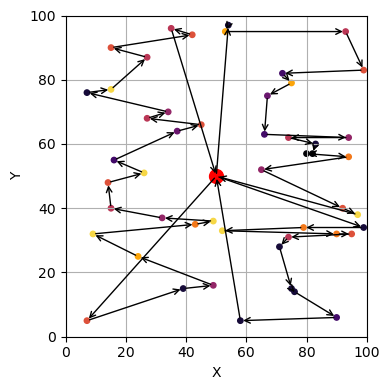

In [11]:
plot_route(route, coords=xy_central.T[:N+1], orders=orders[:N+1])
plt.tight_layout()
plt.savefig("images/heuristic_route.pdf")

In [12]:
def evaluate(individual, distances, orders, max_capacity=1000):
    
    dist = distances[0, individual[0]]
    capacity = max_capacity - orders[individual[0]]
    
    for i, f in zip(individual[:-1], individual[1:]):
        if capacity < orders[f]:
            dist += distances[i][0]
            capacity = max_capacity
            dist += distances[0][f]
            # print("Ups, go back")
        else:
            dist += distances[i][f]
        
        capacity -= orders[f]
        # print(f"Went from {i} to {f} and capacity is now {capacity} and dist is {dist}")        
    dist+=distances[0,individual[-1]]
    return (dist,)

In [14]:
evaluate(route,dist_central,orders)

(1076.0,)